## Ejercicio 2

Julián Cámara Miró

In [2]:
import matplotlib.pyplot as plt

def plot_histogram(result: dict, width=5) -> None:
    
    counts = sorted(result.items(), key=lambda x: x[0])
    
    keys = [str(list(x[0]))[1:-1] for x in counts]
    values = [x[1] for x in counts]

    plt.figure(figsize=(width, 5))
    plt.bar_label(plt.bar(keys, [x / 1000 for x in values]), values)

El algoritmo de Deutsch permite que, teniendo una función de un qubit, podamos determinar si esta es constante o balanceada (suponiendo que es alguna de estas dos opciones), en una sola *"evaluación"*. Para aplicar este algoritmo se requiere un qubit auxiliar.

Los pasos a realizar son lo siguientes:

1. Aplicamos una puerta X al qubit auxiliar.

2. Aplicamos una puerta hadamard a ambos qubits. Como en el paso 1 pusimos el qubit auxiliar en el estado $ \ket{1} $, este se encontrará ahora en el estado $\ket{-} $.

3. Aplicamos el oráculo. Como el qubit de auxiliar se encontraba en el estado $ \ket{-} $, las CNOT que haya dentro del oráculo cambiaran los signos de las amplitudes de los estados $ \ket{10} $ y $ \ket{11} $.

4. Por último, aplicamos una hadamard al qubit 0. Al haber cambiado las los signos de los estados $ \ket{10} $ y $ \ket{11} $, sabemos que al medir el primero qubit, si la función era constante mediremos $ 0 $, y si la funciñon era balanceada mediremos $ 1 $.

#### Creamos a continuación el circuito para una función constante.

In [5]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(2, 1)
circ.X(1)

circ.H(0)
circ.H(1)

circ.CX(0, 1)
circ.X(0)
circ.CX(0, 1)
circ.H(0)

circ.Measure(0, 0)

render_circuit_jupyter(circ)

Ejecutamos el circuito en el simulador de Qiskit.

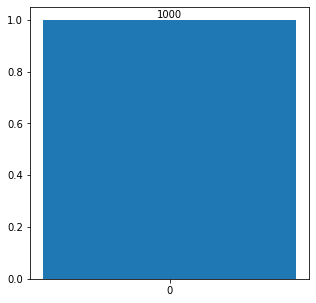

In [6]:
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
backend.get_compiled_circuit(circ)
counts = backend.run_circuit(circ, n_shots=1000).get_counts()

plot_histogram(counts)

Como se comentó anteriormente, al tratarse de una función constante, medimos siempre ***0***.

#### Ahora probamos con una función balanceada.

In [ ]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(2, 1)
circ.X(1)

circ.H(0)
circ.H(1)

circ.CX(0, 1)
circ.H(0)

circ.Measure(0, 0)

render_circuit_jupyter(circ)

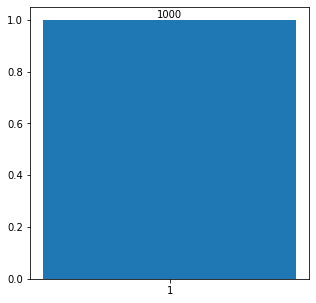

In [4]:
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
backend.get_compiled_circuit(circ)
counts = backend.run_circuit(circ, n_shots=1000).get_counts()

plot_histogram(counts)

Efecitvamente, al tratarse ahora de una función balanceada, medimos siempre un resultado distintio de ***0***.